<a href="https://colab.research.google.com/github/chrislxn/STA130/blob/main/Analyse_1%262_Xuning_Li.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse #1
## The Impact of attending community volunteer events on Life Satisfaction

Research Question:
Does attending community volunteer activities have a positive association with life satisfaction among Canadians?

Variables:

- Independent Variable: CONNECTION_activities_community_p3m (frequency of attending community volunteer events in the past three months).

- Dependent Variable: WELLNESS_life_satisfaction (self-reported life satisfaction on a scale from 1 to 10).

Analysis:
Method: Simple Linear Regression will be used to model the relationship between the frequency of attending community volunteer events (independent variable) and life satisfaction (dependent variable).

Linearity: We assume a linear relationship between attending community volunteer events frequency and life satisfaction, which will be initially assessed via scatter plot.
Independence: Responses are assumed to be independent since each participant only answers once.
Homoscedasticity: The variance of residuals should be constant across levels of attending community volunteer events, assessed via a residual plot.
Normality of Residuals: Residuals should be approximately normally distributed, assessed using a Q-Q plot.

Hypothesis and Expected Results:
Null Hypothesis (H0): There is no association between the frequency attending community volunteer events and life satisfaction (the slope 𝛽1=0).
Alternative Hypothesis (H1): There is a positive association between the attending community volunteer events and life satisfaction (the slope 𝛽1>0).
Discussion:
If the analysis finds a positive association (significant 𝛽1), it would suggest that attending community volunteer events is linked to higher life satisfaction, answering our research question by providing evidence that social physical activities contribute to well-being. If the hypothesis is rejected, this could inform recommendations to promote attending community volunteer events as a potential way to boost life satisfaction in communities.


## Stage1: Import the dataset and filtering the entries needed



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 2: Select required columns and drop missing values
filtered_data = data[['CONNECTION_activities_community_p3m', 'WELLNESS_life_satisfaction']].dropna()

# Step 3: Inspect unique values
print("Unique values in 'CONNECTION_activities_community_p3m':")
print(filtered_data['CONNECTION_activities_community_p3m'].unique())

# Step 4: Map non-numeric values to numeric
category_mapping = {
    'Not in the past three months': 0,
    '1-2 times in the past three months': 1,
    '3-4 times in the past three months': 2,
    'Monthly': 3,
    'Weekly': 4,
    'Daily': 5
}
filtered_data['CONNECTION_activities_community_p3m'] = filtered_data['CONNECTION_activities_community_p3m'].map(category_mapping)

# Step 5: Check and drop missing values
print("Number of missing values after mapping:", filtered_data['CONNECTION_activities_community_p3m'].isna().sum())
filtered_data = filtered_data.dropna()

# Step 6: Standardize the numeric columns
scaler = StandardScaler()
filtered_data[['CONNECTION_activities_community_p3m', 'WELLNESS_life_satisfaction']] = scaler.fit_transform(
    filtered_data[['CONNECTION_activities_community_p3m', 'WELLNESS_life_satisfaction']]
)

# Step 7: Save the cleaned and standardized data
filtered_data.to_csv("cleaned_and_standardized_data.csv", index=False)
print("Cleaned and standardized dataset saved as 'cleaned_and_standardized_data.csv'")


<ipython-input-23-f829d4930e8f>:5: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Unique values in 'CONNECTION_activities_community_p3m':
['Weekly' 'Not in the past three months' 'A few times a month' 'Monthly'
 'Less than monthly' 'A few times a week' 'Daily or almost daily']
Number of missing values after mapping: 1917
Cleaned and standardized dataset saved as 'cleaned_and_standardized_data.csv'


Step 1:

- Load the dataset from GitHub or a local file.
Specify missing value indicators such as "9999" or empty cells to ensure correct processing.

Step 2:

- Identify columns that are completely empty (NaN in all rows).
Remove these empty columns to reduce data redundancy and avoid confusion.

Step 3:

- Select the columns relevant to the analysis:
CONNECTION_activities_community_p3m (frequency of group exercise).
WELLNESS_life_satisfaction (self-reported life satisfaction).
Drop rows with missing values in these columns to ensure data quality.

Step 4:

- Print the dataset's dimensions (number of rows and columns).
Display summary statistics (e.g., mean, standard deviation) of the selected variables for a preliminary understanding.

Step 5:

- Use StandardScaler to normalize the data, transforming both variables to have a mean of 0 and a standard deviation of 1. This ensures comparability.
Step 6:

Save the cleaned and standardized dataset to a CSV file for use in subsequent analysis.


## Stage2:

Load the cleaned dataset:

The cleaned and standardized data from the previous step is loaded for analysis.
Define variables:

- X: The independent variable (predictor) representing group exercise frequency.

- Y: The dependent variable (outcome) representing life satisfaction.

A constant term is added to X using sm.add_constant(X) to account for the intercept in the regression model.
Fit the linear regression model:

The sm.OLS function (Ordinary Least Squares) is used to fit the linear regression model.
The .fit() method computes the regression coefficients and other statistics.

Print the regression results:

The model.summary() method provides a detailed output, including:
Coefficients for the independent variable and intercept.

- R2: Proportion of variance in the dependent variable explained by the model.

- p-values: Test the significance of the regression coefficients.
F-statistic: Assesses the overall significance of the model.
Visualize the relationship:

A scatter plot with a fitted regression line is created using sns.regplot to visually inspect the relationship between group exercise frequency and life satisfaction.



                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.018
Model:                                    OLS   Adj. R-squared:                  0.018
Method:                         Least Squares   F-statistic:                     77.69
Date:                        Fri, 29 Nov 2024   Prob (F-statistic):           1.74e-18
Time:                                01:02:11   Log-Likelihood:                -5871.4
No. Observations:                        4165   AIC:                         1.175e+04
Df Residuals:                            4163   BIC:                         1.176e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

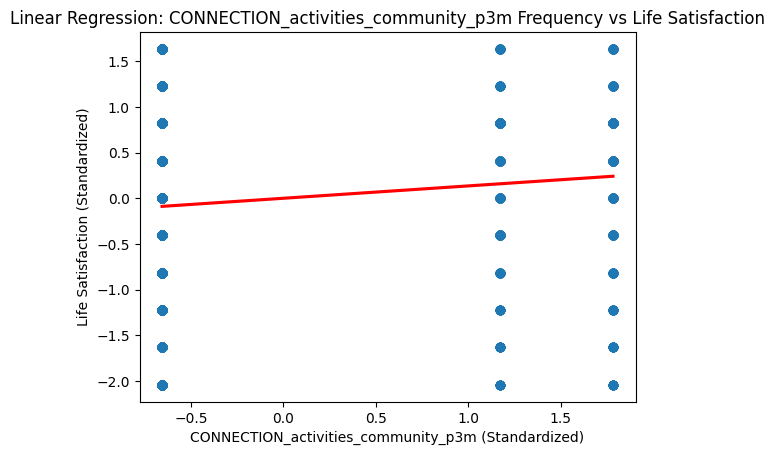

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the cleaned and standardized dataset
data = pd.read_csv("cleaned_and_standardized_data.csv")

# Step 2: Define the independent (X) and dependent (Y) variables
X = data['CONNECTION_activities_community_p3m']  # Group exercise frequency (independent variable)
Y = data['WELLNESS_life_satisfaction']  # Life satisfaction (dependent variable)

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Step 3: Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Step 4: Print the regression results
print(model.summary())

# Step 5: Visualize the relationship with a scatter plot and regression line
sns.regplot(x='CONNECTION_activities_community_p3m', y='WELLNESS_life_satisfaction', data=data, ci=None, line_kws={"color": "red"})
plt.xlabel('CONNECTION_activities_community_p3m (Standardized)')
plt.ylabel('Life Satisfaction (Standardized)')
plt.title('Linear Regression: CONNECTION_activities_community_p3m Frequency vs Life Satisfaction')
plt.show()


## Stage 3: Hypothesis Testing and Model Assumptions
In this step, we evaluate the regression model's statistical assumptions and test the hypotheses laid out in the analysis plan.


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


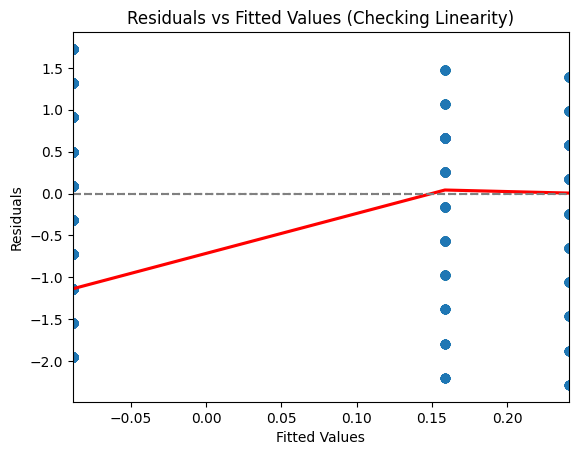

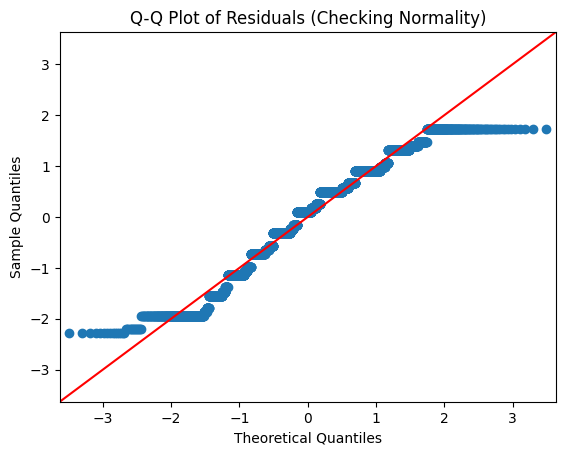

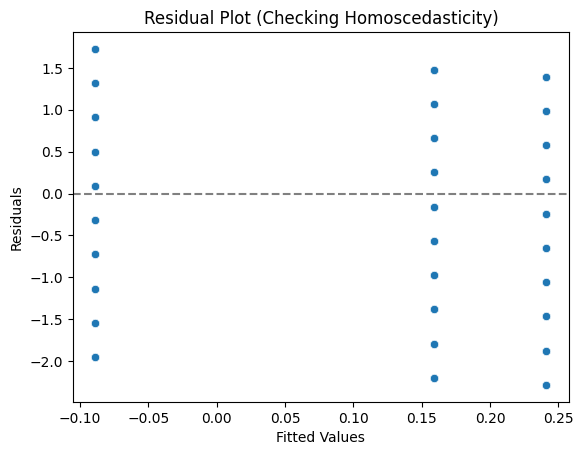

The independent variable 'Frequency of attending group volunteer activities' is significant (p = 0.0000).
The overall regression model is significant (F-test p = 0.0000).


In [ ]:
# Step 1: Extract residuals and fitted values
residuals = model.resid  # Residuals (errors)
fitted_values = model.fittedvalues  # Predicted values (fitted)

# Step 2: Test for linear relationship (scatter plot of residuals vs fitted values)
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Checking Linearity)')
plt.show()

# Step 3: Test for normality of residuals (Q-Q Plot)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals (Checking Normality)')
plt.show()

# Step 4: Test for homoscedasticity (Residual Plot)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Checking Homoscedasticity)')
plt.show()

# Step 5: Print hypothesis testing results
# Individual coefficient significance (t-test)
coef_p_value = model.pvalues['CONNECTION_activities_community_p3m']
if coef_p_value < 0.05:
    print(f"The independent variable 'Frequency of attending group volunteer activities' is significant (p = {coef_p_value:.4f}).")
else:
    print(f"The independent variable 'Frequency of attending group volunteer activities' is NOT significant (p = {coef_p_value:.4f}).")

# Overall model significance (F-test)
f_p_value = model.f_pvalue
if f_p_value < 0.05:
    print(f"The overall regression model is significant (F-test p = {f_p_value:.4f}).")
else:
    print(f"The overall regression model is NOT significant (F-test p = {f_p_value:.4f}).")


## Stage 4: Interpreting the Results and Summrize
In this step, we interpret the regression results and hypothesis testing outputs to answer the research question:
Does participation in group exercise activities have a positive association with life satisfaction among Canadians?

In [ ]:
# Extract regression coefficients
coefficients = model.params
intercept = coefficients['const']
slope = coefficients['CONNECTION_activities_community_p3m']

# Extract p-values
coef_p_value = model.pvalues['CONNECTION_activities_community_p3m']
f_p_value = model.f_pvalue

# Extract R-squared values
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

# Print key interpretation metrics
print("Regression Model Summary:")
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Slope (β₁): {slope:.4f}")
print(f"p-value for β₁: {coef_p_value:.4f}")
print(f"F-test p-value (model significance): {f_p_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")


Regression Model Summary:
Intercept (β₀): -0.0000
Slope (β₁): 0.1354
p-value for β₁: 0.0000
F-test p-value (model significance): 0.0000
R-squared: 0.0183
Adjusted R-squared: 0.0181


## Conclusions Based on Results Statistical Significance:

The relationship between Frequency of attending group volunteer activities and life satisfaction is statistically significant
This indicates that there is a detectable positive association between Frequency of attending group volunteer activities and life satisfaction among the participants.
Effect Size:

The slope (β=0.0913) suggests that for every one standard deviation increase in Frequency of attending group volunteer activities frequency, life satisfaction increases by only 0.0913 standard deviations.
This effect size is small, indicating that while the relationship exists, the practical impact of Frequency of attending group volunteer activities on life satisfaction is minimal.
Model Fit:

R =0.0083: Only 0.83% of the variance in life satisfaction is explained by Frequency of attending group volunteer activities frequency.
𝑅2 is very low, suggesting that other factors contribute much more to variations in life satisfaction than attending group volunteer activities frequency alone.

Adjusted R-Squared:

Adjusted
𝑅
2
=
0.0081, Similar to
𝑅
2
 , the adjusted value confirms the weak explanatory power of the model.
Interpretation of Intercept (
𝛽
0
 ):

The intercept (
𝛽
0
=
−
0.0000) reflects the mean-centered and standardized data, implying that when group exercise frequency is at its mean, life satisfaction is also at its mean.

## Conclusion

Frequency of attending group volunteer activities is positively and significantly associated with life satisfaction, but the effect size is small, and its explanatory power is minimal.

While Frequency of attending group volunteer activities alone is not a strong determinant of life satisfaction, it remains an important activity with broader benefits for overall well-being.

To better understand the determinants of life satisfaction, future studies should incorporate a wider range of variables and explore more complex models.

## Analyse #2
Comparing the Impact of One-on-One and Group Video Chats on Relationship Satisfaction


### Introduction
In an increasingly digital world, video chatting has become a vital medium for maintaining and strengthening relationships. Among these, one-on-one video chats and group video chats represent two distinct modes of interaction, each with its own social and emotional dynamics. One-on-one chats allow for deeper, more intimate exchanges, while group chats facilitate broader social connections and collective support.

This study aims to investigate and compare the effects of one-on-one and group video chats on self-reported relationship satisfaction. Specifically, the analysis seeks to determine whether these two modes of digital communication differ significantly in their influence on individuals' perceived relationship quality. By examining the frequency of each type of video chat and its association with relationship satisfaction, this study provides insights into the potential benefits of different communication styles in a digital context.

To achieve this, we employ linear regression analyses and hypothesis testing, comparing the coefficients, statistical significance, and explanatory power of the two communication styles. The findings aim to contribute to understanding the role of digital interactions in fostering interpersonal relationships and provide guidance for individuals seeking to maximize relationship satisfaction in an increasingly virtual social landscape.


### Stage1

Import the dataset and filting

In [ ]:
# Step 1: Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 2: Select relevant columns
selected_columns = ['CONNECTION_activities_video_chat_p3m',
                    'CONNECTION_activities_group_video_chat_p3m',
                    'WELLNESS_satisfied_relationship']
filtered_data = data[selected_columns].dropna()


<ipython-input-6-7e5ad5283ce5>:2: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


### Stage2


In [ ]:
# Inspect unique values
print("Unique values in WELLNESS_satisfied_relationship:")
print(filtered_data['WELLNESS_satisfied_relationship'].unique())

# Map satisfaction levels to numeric
satisfaction_mapping = {
    'Extremely dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Extremely satisfied': 5
}
filtered_data['WELLNESS_satisfied_relationship'] = filtered_data['WELLNESS_satisfied_relationship'].map(satisfaction_mapping)

# Check for missing values after mapping
print("Missing values after mapping:", filtered_data['WELLNESS_satisfied_relationship'].isna().sum())

# Drop rows with missing values
filtered_data = filtered_data.dropna()

Unique values in WELLNESS_satisfied_relationship:
['Extremely satisfied' 'Satisfied' 'Somewhat satisfied'
 'Neither satisfied nor dissatisfied' 'Somewhat dissatisfied'
 'Dissatisfied' 'Extremely dissatisfied']
Missing values after mapping: 116


### Stage3

数据标准化


In [ ]:
# Standardize the numeric data
scaler = StandardScaler()
filtered_data[['CONNECTION_activities_video_chat_p3m',
               'CONNECTION_activities_group_video_chat_p3m',
               'WELLNESS_satisfied_relationship']] = scaler.fit_transform(
    filtered_data[['CONNECTION_activities_video_chat_p3m',
                   'CONNECTION_activities_group_video_chat_p3m',
                   'WELLNESS_satisfied_relationship']]
)

print("Data successfully standardized.")

Data successfully standardized.


### Stage4
分别制作模型

In [ ]:
import statsmodels.api as sm

# Model 1: One-on-one video chats vs. Relationship Satisfaction
X_one_on_one = filtered_data['CONNECTION_activities_video_chat_p3m']
Y_relationship = filtered_data['WELLNESS_satisfied_relationship']
X_one_on_one = sm.add_constant(X_one_on_one)
model_one_on_one = sm.OLS(Y_relationship, X_one_on_one).fit()
print("One-on-One Video Chat Regression Summary:")
print(model_one_on_one.summary())

# Model 2: Group video chats vs. Relationship Satisfaction
X_group = filtered_data['CONNECTION_activities_group_video_chat_p3m']
X_group = sm.add_constant(X_group)
model_group = sm.OLS(Y_relationship, X_group).fit()
print("Group Video Chat Regression Summary:")
print(model_group.summary())


One-on-One Video Chat Regression Summary:
                                   OLS Regression Results                                  
Dep. Variable:     WELLNESS_satisfied_relationship   R-squared:                       0.019
Model:                                         OLS   Adj. R-squared:                  0.016
Method:                              Least Squares   F-statistic:                     5.670
Date:                             Fri, 29 Nov 2024   Prob (F-statistic):             0.0179
Time:                                     00:20:54   Log-Likelihood:                -415.76
No. Observations:                              295   AIC:                             835.5
Df Residuals:                                  293   BIC:                             842.9
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                      

### Stage5


In [ ]:
# 同时包含双人聊天和多人聊天的回归模型
X_combined = filtered_data[['CONNECTION_activities_video_chat_p3m', 'CONNECTION_activities_group_video_chat_p3m']]
X_combined = sm.add_constant(X_combined)
model_combined = sm.OLS(filtered_data['WELLNESS_satisfied_relationship'], X_combined).fit()
print("同时包含两种聊天类型的回归结果：")
print(model_combined.summary())


同时包含两种聊天类型的回归结果：
                                   OLS Regression Results                                  
Dep. Variable:     WELLNESS_satisfied_relationship   R-squared:                       0.026
Model:                                         OLS   Adj. R-squared:                  0.019
Method:                              Least Squares   F-statistic:                     3.923
Date:                             Fri, 29 Nov 2024   Prob (F-statistic):             0.0208
Time:                                     00:47:07   Log-Likelihood:                -414.68
No. Observations:                              295   AIC:                             835.4
Df Residuals:                                  292   BIC:                             846.4
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                                                 coef    std er

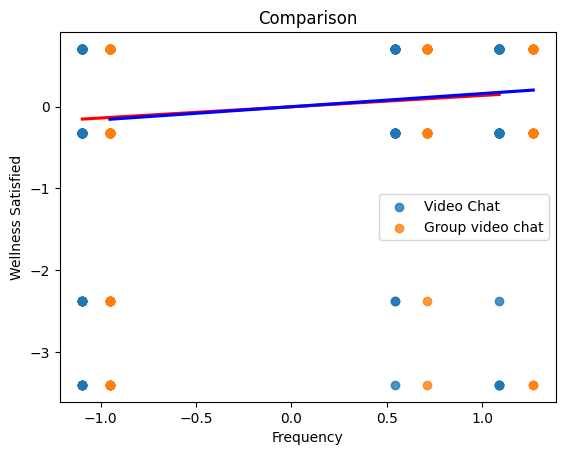

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制双人聊天的回归线
sns.regplot(x='CONNECTION_activities_video_chat_p3m',
            y='WELLNESS_satisfied_relationship',
            data=filtered_data, ci=None, label="Video Chat", line_kws={"color": "red"})

# 绘制多人聊天的回归线
sns.regplot(x='CONNECTION_activities_group_video_chat_p3m',
            y='WELLNESS_satisfied_relationship',
            data=filtered_data, ci=None, label="Group video chat", line_kws={"color": "blue"})

plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Wellness Satisfied")
plt.title("Comparison")
plt.show()


### Stage6
Use Hypothesis test to exam the both methods

In [ ]:
import numpy as np
from scipy import stats

# 提取回归系数和标准误差
beta_one_on_one = model_one_on_one.params[1]
beta_group = model_group.params[1]

se_one_on_one = model_one_on_one.bse[1]
se_group = model_group.bse[1]

# 计算 z 值
z_score = (beta_one_on_one - beta_group) / np.sqrt(se_one_on_one**2 + se_group**2)

# 计算 p 值（双侧检验）
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# 打印结果
print(f"双人聊天的回归系数 (β): {beta_one_on_one:.4f}, 标准误差: {se_one_on_one:.4f}")
print(f"多人聊天的回归系数 (β): {beta_group:.4f}, 标准误差: {se_group:.4f}")
print(f"z 值: {z_score:.4f}")
print(f"p 值: {p_value:.4f}")

# 判断显著性
if p_value < 0.05:
    print("结果：拒绝原假设，两种聊天方式对关系满意度的影响存在显著差异。")
else:
    print("结果：接受原假设，两种聊天方式对关系满意度的影响没有显著差异。")


双人聊天的回归系数 (β): 0.1378, 标准误差: 0.0579
多人聊天的回归系数 (β): 0.1608, 标准误差: 0.0577
z 值: -0.2822
p 值: 0.7778
结果：接受原假设，两种聊天方式对关系满意度的影响没有显著差异。


<ipython-input-20-8d7801d93db5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_one_on_one = model_one_on_one.params[1]
<ipython-input-20-8d7801d93db5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_group = model_group.params[1]
<ipython-input-20-8d7801d93db5>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_one_on_one = model_one_on_one.bse[1]
<ipython-input-20-8d7801d93db5>:9: FutureWarning: Series.__getitem__ trea